# Project: Flag Continent Prediction
In this project, we want to predict which continent a flag belongs to using decision trees. 

## Part 1: Load the data

In [3]:
import pandas as pd
import numpy as np

In [4]:
# load the data
flags = pd.read_csv('14 ML_DecisionTrees_FlagIdentification.csv', header = 0)
flags.head(3)

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white


## Part 2: Feature Selection

In [5]:
# we want to predict on which landmass a flag is on. So, landmass column is our lablel
landmass = flags [['Landmass']]
landmass.head(3)

,Landmass
0,5
1,3
2,4


In [6]:
# features to predict the landmass 
data= flags [["Red", "Green", "Blue", "Gold", "White", "Black", "Orange"]]
data.head(3)

,Red,Green,Blue,Gold,White,Black,Orange
0,1,1,0,1,1,1,0
1,1,0,0,1,0,1,0
2,1,1,0,0,1,0,0


## Part 3: Data Segregation 

In [9]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(data, landmass, train_size=0.8, test_size=0.2, random_state=1)


## Part 4: Create Decision Tree Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [11]:
# Scoring the model on the test data
tree.score(test_data, test_label)

0.38461538461538464

## Part 5: Model Tuning (Prune the tree)

In [15]:
# We’ll now see how the accuracy changes depending on how large we allow the tree to be
def prune(data,label):
    train_data, test_data, train_label, test_label = train_test_split(data, landmass, train_size=0.8, test_size=0.2, random_state=1)
    scores = []
    for i in range(1,21):
        tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
        tree.fit(train_data,train_label)
        scores.append(tree.score(test_data, test_label))
    max_acu = max(scores)
    best_depth = scores.index(max(scores)) 
    print("Accuracy list is: ")
    print(scores)
    print("max accuracy is " + str(max_acu) +" and best depth is " +str(best_depth)) 
    return scores 


In [18]:
scores = prune(data,landmass)
print(scores)

Accuracy list is: 
[0.41025641025641024, 0.2564102564102564, 0.38461538461538464, 0.3333333333333333, 0.358974358974359, 0.358974358974359, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464]
max accuracy is 0.41025641025641024 and best depth is 0
[0.41025641025641024, 0.2564102564102564, 0.38461538461538464, 0.3333333333333333, 0.358974358974359, 0.358974358974359, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464]


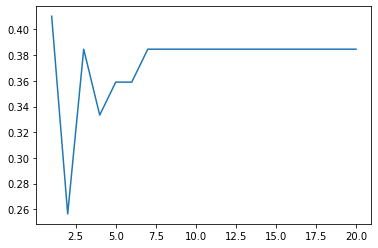

In [19]:
# Plot the accuracy vs the tree depth 
import matplotlib.pyplot as plt
plt.plot(range(1,21), scores)
plt.show()

In [20]:
# Adding more features, mainly the shapes
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange","Circles","Crosses","Saltires","Quarters","Sunstars","Crescent","Triangle"]]
scores = prune(data,landmass)
print(scores)


Accuracy list is: 
[0.41025641025641024, 0.48717948717948717, 0.5384615384615384, 0.5641025641025641, 0.5641025641025641, 0.5384615384615384, 0.48717948717948717, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156]
max accuracy is 0.5641025641025641 and best depth is 3
[0.41025641025641024, 0.48717948717948717, 0.5384615384615384, 0.5641025641025641, 0.5641025641025641, 0.5384615384615384, 0.48717948717948717, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156]


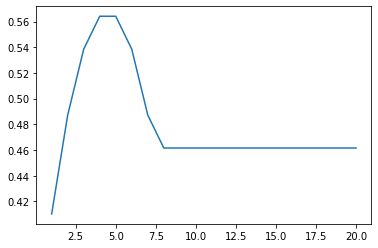

In [21]:
# Plot the accuracy vs the tree depth 
import matplotlib.pyplot as plt
plt.plot(range(1,21), scores)
plt.show()